In [2]:
import numpy as np
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.optimizers import SGD

Using TensorFlow backend.


In [3]:
# First install CIFAR10 from Keras
from keras.datasets import cifar10

(x_training, y_training), (x_test, y_test) = cifar10.load_data()

170500096/170498071 [==============================] - 3s 0us/step


In [4]:
# Then split 'training' into two subsets: train and validation.
# After that, we have 3 subsets: train, validation and test.
from sklearn.model_selection import train_test_split

# 80% train, 20% validation, and by stratefied sampling.  
x_train, x_valid, y_train, y_valid = train_test_split(x_training, y_training,
                                                      stratify=y_training, 
                                                      test_size=0.2)

In [5]:
# Obtain the one-hot-vector representation of target (y).
num_classes = 10

y_train_bin = keras.utils.to_categorical(y_train, num_classes)
y_valid_bin = keras.utils.to_categorical(y_valid, num_classes)
y_test_bin = keras.utils.to_categorical(y_test, num_classes)

In [6]:
# TensorFlow and tf.keras
import tensorflow as tf
import matplotlib.pyplot as plt

In [7]:
# Scaled images saved into new variables x_train_s, x_valid_s, x_test_s.
(x_train_s, x_valid_s, x_test_s)=(x_train/ 255.0, x_valid/ 255.0, x_test/ 255.0)

In [8]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship','truck']

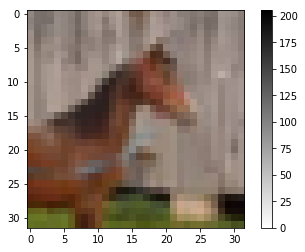

In [53]:
plt.figure()
plt.imshow(x_train[0],cmap=plt.cm.binary)
plt.colorbar()
plt.grid(False)

/home/jupyterlab/conda/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


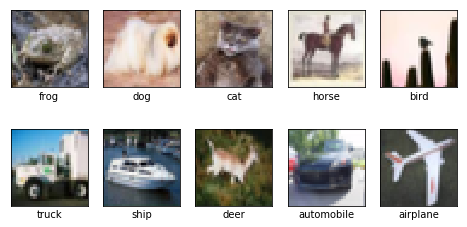

In [12]:
plt.figure(figsize=(8,4))
s=list(range(10))
t=0
for i in range(len(x_train)):
    if t<10:
        plt.subplot(2,5,t+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        cat_v=y_train[i][0]
        if cat_v in s:
            plt.imshow(x_train[i], cmap=plt.cm.binary)
            plt.xlabel(class_names[y_train[i][0]])
            s.remove(cat_v)
            t=t+1

/home/jupyterlab/conda/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


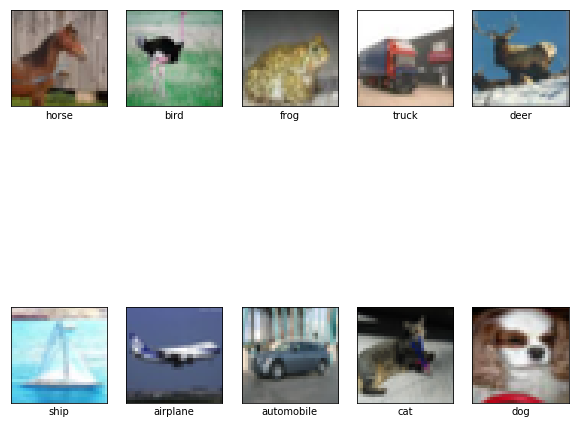

In [72]:
plt.figure(figsize=(10,10))
s=list(range(10))
t=0
for i in range(len(x_train)):
    if t<10:
        plt.subplot(2,5,t+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        cat_v=y_train[i][0]
        if cat_v in s:
            plt.imshow(x_train[i], cmap=plt.cm.binary)
            plt.xlabel(class_names[y_train[i][0]])
            s.remove(cat_v)
            t=t+1

### Part 1: Base model

In [11]:
model = Sequential()
# input: 32x32 images with 3 channels
# this applies 32 convolution filters of size 5x5 each.
model.add(Conv2D(32, (5, 5),strides=(1, 1), activation='relu', input_shape=(32, 32, 3)))
model.add(MaxPooling2D(pool_size=(2, 2),strides=(2, 2)))
#model.add(Dropout(0.25))
model.add(Conv2D(32, (5, 5),strides=(1, 1), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2),strides=(2, 2)))
#model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
#model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

In [13]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 32)        2432      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 10, 10, 32)        25632     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 800)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               410112    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                5130      
Total para

In [17]:
#sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [22]:
model_base_history=model.fit(x_train_s, y_train_bin,
          batch_size=600, epochs=30, validation_data=(x_valid_s, y_valid_bin))

Train on 40000 samples, validate on 10000 samples
Epoch 1/30
40000/40000 [==============================] - 33s 816us/step - loss: 0.2561 - acc: 0.9212 - val_loss: 1.1163 - val_acc: 0.6845
Epoch 2/30
40000/40000 [==============================] - 33s 823us/step - loss: 0.2054 - acc: 0.9401 - val_loss: 1.1429 - val_acc: 0.6858
Epoch 3/30
40000/40000 [==============================] - 33s 818us/step - loss: 0.1860 - acc: 0.9468 - val_loss: 1.1721 - val_acc: 0.6843
Epoch 4/30
40000/40000 [==============================] - 32s 808us/step - loss: 0.1734 - acc: 0.9507 - val_loss: 1.1881 - val_acc: 0.6881
Epoch 5/30
40000/40000 [==============================] - 32s 803us/step - loss: 0.1627 - acc: 0.9549 - val_loss: 1.2076 - val_acc: 0.6886
Epoch 6/30
40000/40000 [==============================] - 32s 806us/step - loss: 0.1534 - acc: 0.9581 - val_loss: 1.2233 - val_acc: 0.6883
Epoch 7/30
40000/40000 [==============================] - 32s 804us/step - loss: 0.1442 - acc: 0.9613 - val_loss: 1.

### Part 2: open experiment and model comparison

#### 1. address overfitting

In [25]:
# from the previous base model, at epoch 30, the accuracy for training is 0.9985, the accuracy for validation is 0.6815, overfitting is observed here
# After this step, the model_1 gives accuracy at 0.72 for both train and validation data at epoch 30.

In [24]:
model_1 = Sequential()
# input: 32x32 images with 3 channels
# this applies 32 convolution filters of size 5x5 each.
model_1.add(Conv2D(32, (5, 5),strides=(1, 1), activation='relu', input_shape=(32, 32, 3)))
model_1.add(MaxPooling2D(pool_size=(2, 2),strides=(2, 2)))
model_1.add(Dropout(0.25))
model_1.add(Conv2D(32, (5, 5),strides=(1, 1), activation='relu'))
model_1.add(MaxPooling2D(pool_size=(2, 2),strides=(2, 2)))
model_1.add(Dropout(0.25))

model_1.add(Flatten())
model_1.add(Dense(512, activation='relu'))
model_1.add(Dropout(0.5))
model_1.add(Dense(10, activation='softmax'))

model_1.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model_1_history=model_1.fit(x_train_s, y_train_bin,
          batch_size=600, epochs=30, validation_data=(x_valid_s, y_valid_bin))


Train on 40000 samples, validate on 10000 samples
Epoch 1/30
40000/40000 [==============================] - 35s 878us/step - loss: 1.9268 - acc: 0.2906 - val_loss: 1.6463 - val_acc: 0.4092
Epoch 2/30
40000/40000 [==============================] - 35s 879us/step - loss: 1.5760 - acc: 0.4245 - val_loss: 1.4441 - val_acc: 0.4879
Epoch 3/30
40000/40000 [==============================] - 34s 846us/step - loss: 1.4573 - acc: 0.4714 - val_loss: 1.3760 - val_acc: 0.5204
Epoch 4/30
40000/40000 [==============================] - 34s 861us/step - loss: 1.3685 - acc: 0.5043 - val_loss: 1.2872 - val_acc: 0.5440
Epoch 5/30
40000/40000 [==============================] - 34s 848us/step - loss: 1.3142 - acc: 0.5307 - val_loss: 1.2028 - val_acc: 0.5798
Epoch 6/30
40000/40000 [==============================] - 34s 853us/step - loss: 1.2551 - acc: 0.5503 - val_loss: 1.1685 - val_acc: 0.5920
Epoch 7/30
40000/40000 [==============================] - 34s 844us/step - loss: 1.2118 - acc: 0.5671 - val_loss: 1.

#### 2. add more convolution layers

In [ ]:
# after model_2, the accuary at epoch 30 is around 0.71, which is worse than the previous step.

In [26]:
model_2 = Sequential()
# input: 32x32 images with 3 channels
# this applies 32 convolution filters of size 5x5 each.
model_2.add(Conv2D(32, (5, 5),strides=(1, 1), activation='relu', input_shape=(32, 32, 3)))
model_2.add(Conv2D(32, (5, 5),strides=(1, 1), activation='relu'))
model_2.add(MaxPooling2D(pool_size=(2, 2),strides=(2, 2)))
model_2.add(Dropout(0.25))
model_2.add(Conv2D(32, (5, 5),strides=(1, 1), activation='relu'))
model_2.add(Conv2D(32, (5, 5),strides=(1, 1), activation='relu'))
model_2.add(MaxPooling2D(pool_size=(2, 2),strides=(2, 2)))
model_2.add(Dropout(0.25))

model_2.add(Flatten())
model_2.add(Dense(512, activation='relu'))
#model_2.add(Dropout(0.5))
model_2.add(Dense(10, activation='softmax'))

model_2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model_2_history=model_2.fit(x_train_s, y_train_bin,
          batch_size=600, epochs=30, validation_data=(x_valid_s, y_valid_bin))


Train on 40000 samples, validate on 10000 samples
Epoch 1/30
40000/40000 [==============================] - 99s 2ms/step - loss: 1.9993 - acc: 0.2540 - val_loss: 1.7779 - val_acc: 0.3426
Epoch 2/30
40000/40000 [==============================] - 103s 3ms/step - loss: 1.6948 - acc: 0.3691 - val_loss: 1.5901 - val_acc: 0.4013
Epoch 3/30
40000/40000 [==============================] - 102s 3ms/step - loss: 1.5331 - acc: 0.4352 - val_loss: 1.4373 - val_acc: 0.4668
Epoch 4/30
40000/40000 [==============================] - 103s 3ms/step - loss: 1.4391 - acc: 0.4737 - val_loss: 1.3384 - val_acc: 0.5079
Epoch 5/30
40000/40000 [==============================] - 101s 3ms/step - loss: 1.3548 - acc: 0.5098 - val_loss: 1.2678 - val_acc: 0.5406
Epoch 6/30
40000/40000 [==============================] - 83s 2ms/step - loss: 1.2996 - acc: 0.5316 - val_loss: 1.2215 - val_acc: 0.5629
Epoch 7/30
40000/40000 [==============================] - 69s 2ms/step - loss: 1.2395 - acc: 0.5546 - val_loss: 1.1544 - val

In [27]:
# model_3 #add one convolutional layer with dropout
model_3 = Sequential()
# input: 32x32 images with 3 channels
# this applies 32 convolution filters of size 5x5 each.
model_3.add(Conv2D(32, (5, 5),strides=(1, 1), activation='relu', input_shape=(32, 32, 3)))
#add one convolutional layer
model_3.add(Conv2D(32, (5, 5),strides=(1, 1), activation='relu'))
model_3.add(MaxPooling2D(pool_size=(2, 2),strides=(2, 2)))
model_3.add(Dropout(0.25))
model_3.add(Conv2D(32, (5, 5),strides=(1, 1), activation='relu'))
model_3.add(MaxPooling2D(pool_size=(2, 2),strides=(2, 2)))
model_3.add(Dropout(0.25))

model_3.add(Flatten())
model_3.add(Dense(512, activation='relu'))
#model_3.add(Dropout(0.5))
model_3.add(Dense(10, activation='softmax'))

model_3.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model_3_history=model_3.fit(x_train_s, y_train_bin,
          batch_size=600, epochs=30, validation_data=(x_valid_s, y_valid_bin))


Train on 40000 samples, validate on 10000 samples
Epoch 1/30
40000/40000 [==============================] - 74s 2ms/step - loss: 1.9661 - acc: 0.2674 - val_loss: 1.6997 - val_acc: 0.3860
Epoch 2/30
40000/40000 [==============================] - 73s 2ms/step - loss: 1.6060 - acc: 0.4131 - val_loss: 1.5119 - val_acc: 0.4596
Epoch 3/30
40000/40000 [==============================] - 71s 2ms/step - loss: 1.4579 - acc: 0.4686 - val_loss: 1.3587 - val_acc: 0.5122
Epoch 4/30
40000/40000 [==============================] - 72s 2ms/step - loss: 1.3804 - acc: 0.5018 - val_loss: 1.3091 - val_acc: 0.5356
Epoch 5/30
40000/40000 [==============================] - 71s 2ms/step - loss: 1.2994 - acc: 0.5301 - val_loss: 1.2379 - val_acc: 0.5640
Epoch 6/30
40000/40000 [==============================] - 71s 2ms/step - loss: 1.2338 - acc: 0.5577 - val_loss: 1.1933 - val_acc: 0.5789
Epoch 7/30
40000/40000 [==============================] - 71s 2ms/step - loss: 1.1962 - acc: 0.5745 - val_loss: 1.1700 - val_acc

In [ ]:
# model_4 using both dropout and L2 regularization

In [29]:
from keras import regularizers
model_4 = Sequential()
# input: 32x32 images with 3 channels
# this applies 32 convolution filters of size 5x5 each.
model_4.add(Conv2D(32, (5, 5),strides=(1, 1), kernel_regularizer=keras.regularizers.l2(0.001), activation='relu', input_shape=(32, 32, 3)))
model_4.add(MaxPooling2D(pool_size=(2, 2),strides=(2, 2)))
model_4.add(Dropout(0.25))
model_4.add(Conv2D(32, (5, 5),strides=(1, 1), kernel_regularizer=keras.regularizers.l2(0.001),  activation='relu'))
model_4.add(MaxPooling2D(pool_size=(2, 2),strides=(2, 2)))
model_4.add(Dropout(0.25))
model_4.add(Flatten())
model_4.add(Dense(512, activation='relu'))
#model_4.add(Dropout(0.5))
model_4.add(Dense(10, activation='softmax'))

model_4.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model_4_history=model_4.fit(x_train_s, y_train_bin,
          batch_size=600, epochs=30, validation_data=(x_valid_s, y_valid_bin))


Train on 40000 samples, validate on 10000 samples
Epoch 1/30
40000/40000 [==============================] - 35s 866us/step - loss: 1.9050 - acc: 0.3127 - val_loss: 1.6501 - val_acc: 0.4178
Epoch 2/30
40000/40000 [==============================] - 33s 830us/step - loss: 1.5735 - acc: 0.4378 - val_loss: 1.4924 - val_acc: 0.4853
Epoch 3/30
40000/40000 [==============================] - 33s 830us/step - loss: 1.4546 - acc: 0.4850 - val_loss: 1.4072 - val_acc: 0.5176
Epoch 4/30
40000/40000 [==============================] - 33s 834us/step - loss: 1.3883 - acc: 0.5159 - val_loss: 1.3670 - val_acc: 0.5314
Epoch 5/30
40000/40000 [==============================] - 33s 829us/step - loss: 1.3298 - acc: 0.5369 - val_loss: 1.2673 - val_acc: 0.5705
Epoch 6/30
40000/40000 [==============================] - 33s 834us/step - loss: 1.2770 - acc: 0.5571 - val_loss: 1.2347 - val_acc: 0.5785
Epoch 7/30
40000/40000 [==============================] - 34s 844us/step - loss: 1.2413 - acc: 0.5731 - val_loss: 1.

In [ ]:
model_5 = Sequential()
# input: 32x32 images with 3 channels
# this applies 32 convolution filters of size 5x5 each.
model_5.add(Conv2D(32, (5, 5),strides=(1, 1), kernel_regularizer=keras.regularizers.l2(0.001), activation='relu', input_shape=(32, 32, 3)))
model_5.add(MaxPooling2D(pool_size=(2, 2),strides=(2, 2)))
model_5.add(Conv2D(32, (5, 5),strides=(1, 1), kernel_regularizer=keras.regularizers.l2(0.001), activation='relu'))
model_5.add(MaxPooling2D(pool_size=(2, 2),strides=(2, 2)))

model_5.add(Flatten())
model_5.add(Dense(512, activation='relu'))
model_5.add(Dense(10, activation='softmax'))

model_5_history=model_4.fit(x_train_s, y_train_bin,
          batch_size=600, epochs=30, validation_data=(x_valid_s, y_valid_bin))


Train on 40000 samples, validate on 10000 samples
Epoch 1/30
40000/40000 [==============================] - 34s 852us/step - loss: 0.7245 - acc: 0.7653 - val_loss: 0.8490 - val_acc: 0.7183
Epoch 2/30
40000/40000 [==============================] - 34s 848us/step - loss: 0.7038 - acc: 0.7707 - val_loss: 0.8489 - val_acc: 0.7209
Epoch 3/30
40000/40000 [==============================] - 34s 843us/step - loss: 0.7036 - acc: 0.7725 - val_loss: 0.8457 - val_acc: 0.7220
Epoch 4/30
40000/40000 [==============================] - 34s 858us/step - loss: 0.6826 - acc: 0.7797 - val_loss: 0.8517 - val_acc: 0.7255
Epoch 5/30
40000/40000 [==============================] - 34s 855us/step - loss: 0.6669 - acc: 0.7845 - val_loss: 0.8496 - val_acc: 0.7240
Epoch 6/30
40000/40000 [==============================] - 34s 858us/step - loss: 0.6584 - acc: 0.7885 - val_loss: 0.8573 - val_acc: 0.7204
Epoch 7/30
40000/40000 [==============================] - 34s 847us/step - loss: 0.6513 - acc: 0.7901 - val_loss: 0.

#### 3. change the number of filters

In [32]:
model_6 = Sequential()
# input: 32x32 images with 3 channels
# this applies 32 convolution filters of size 5x5 each.
model_6.add(Conv2D(64, (5, 5),strides=(1, 1), activation='relu', input_shape=(32, 32, 3)))
model_6.add(MaxPooling2D(pool_size=(2, 2),strides=(2, 2)))
model_6.add(Dropout(0.25))
model_6.add(Conv2D(64, (5, 5),strides=(1, 1), activation='relu'))
model_6.add(MaxPooling2D(pool_size=(2, 2),strides=(2, 2)))
model_6.add(Dropout(0.25))

model_6.add(Flatten())
model_6.add(Dense(512, activation='relu'))
model_6.add(Dropout(0.5))
model_6.add(Dense(10, activation='softmax'))

model_6.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model_6_history=model_6.fit(x_train_s, y_train_bin,
          batch_size=600, epochs=30, validation_data=(x_valid_s, y_valid_bin))


Train on 40000 samples, validate on 10000 samples
Epoch 1/30
40000/40000 [==============================] - 49s 1ms/step - loss: 1.9454 - acc: 0.2826 - val_loss: 1.6482 - val_acc: 0.4106
Epoch 2/30
40000/40000 [==============================] - 50s 1ms/step - loss: 1.5837 - acc: 0.4177 - val_loss: 1.4120 - val_acc: 0.4939
Epoch 3/30
40000/40000 [==============================] - 48s 1ms/step - loss: 1.4355 - acc: 0.4786 - val_loss: 1.3847 - val_acc: 0.5098
Epoch 4/30
40000/40000 [==============================] - 48s 1ms/step - loss: 1.3633 - acc: 0.5082 - val_loss: 1.2371 - val_acc: 0.5628
Epoch 5/30
40000/40000 [==============================] - 47s 1ms/step - loss: 1.2860 - acc: 0.5417 - val_loss: 1.1920 - val_acc: 0.5835
Epoch 6/30
40000/40000 [==============================] - 47s 1ms/step - loss: 1.2230 - acc: 0.5633 - val_loss: 1.1349 - val_acc: 0.6006
Epoch 7/30
40000/40000 [==============================] - 47s 1ms/step - loss: 1.1902 - acc: 0.5772 - val_loss: 1.1004 - val_acc

In [35]:
model_7 = Sequential()
# input: 32x32 images with 3 channels
# this applies 32 convolution filters of size 5x5 each.
model_7.add(Conv2D(32, (5, 5),strides=(1, 1), kernel_regularizer=keras.regularizers.l2(0.01), activation='relu', input_shape=(32, 32, 3)))
model_7.add(MaxPooling2D(pool_size=(2, 2),strides=(2, 2)))
model_7.add(Conv2D(32, (5, 5),strides=(1, 1), kernel_regularizer=keras.regularizers.l2(0.01), activation='relu'))
model_7.add(MaxPooling2D(pool_size=(2, 2),strides=(2, 2)))

model_7.add(Flatten())
model_7.add(Dense(512, activation='relu'))
model_7.add(Dense(10, activation='softmax'))

model_7_history=model_4.fit(x_train_s, y_train_bin,
          batch_size=600, epochs=50, validation_data=(x_valid_s, y_valid_bin))


Train on 40000 samples, validate on 10000 samples
Epoch 1/50
40000/40000 [==============================] - 35s 884us/step - loss: 0.2097 - acc: 0.9481 - val_loss: 1.1900 - val_acc: 0.7153
Epoch 2/50
40000/40000 [==============================] - 35s 880us/step - loss: 0.2140 - acc: 0.9460 - val_loss: 1.1699 - val_acc: 0.7289
Epoch 3/50
40000/40000 [==============================] - 35s 873us/step - loss: 0.2083 - acc: 0.9480 - val_loss: 1.1807 - val_acc: 0.7256
Epoch 4/50
40000/40000 [==============================] - 34s 852us/step - loss: 0.2112 - acc: 0.9472 - val_loss: 1.1805 - val_acc: 0.7234
Epoch 5/50
40000/40000 [==============================] - 34s 844us/step - loss: 0.2093 - acc: 0.9473 - val_loss: 1.1856 - val_acc: 0.7182
Epoch 6/50
40000/40000 [==============================] - 34s 843us/step - loss: 0.2026 - acc: 0.9496 - val_loss: 1.1969 - val_acc: 0.7195
Epoch 7/50
40000/40000 [==============================] - 34s 839us/step - loss: 0.2045 - acc: 0.9505 - val_loss: 1.

In [37]:
# number of filter from 64 of model 6 to 128
model_8 = Sequential()
# input: 32x32 images with 3 channels
# this applies 32 convolution filters of size 5x5 each.
model_8.add(Conv2D(128, (5, 5),strides=(1, 1), activation='relu', input_shape=(32, 32, 3)))
model_8.add(MaxPooling2D(pool_size=(2, 2),strides=(2, 2)))
model_8.add(Dropout(0.25))
model_8.add(Conv2D(64, (5, 5),strides=(1, 1), activation='relu'))
model_8.add(MaxPooling2D(pool_size=(2, 2),strides=(2, 2)))
model_8.add(Dropout(0.25))

model_8.add(Flatten())
model_8.add(Dense(512, activation='relu'))
model_8.add(Dropout(0.5))
model_8.add(Dense(10, activation='softmax'))

model_8.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model_8_history=model_8.fit(x_train_s, y_train_bin,
          batch_size=600, epochs=30, validation_data=(x_valid_s, y_valid_bin))


Train on 40000 samples, validate on 10000 samples
Epoch 1/30
40000/40000 [==============================] - 76s 2ms/step - loss: 1.9358 - acc: 0.2823 - val_loss: 1.6431 - val_acc: 0.3978
Epoch 2/30
40000/40000 [==============================] - 75s 2ms/step - loss: 1.5662 - acc: 0.4250 - val_loss: 1.4505 - val_acc: 0.4839
Epoch 3/30
40000/40000 [==============================] - 75s 2ms/step - loss: 1.4326 - acc: 0.4827 - val_loss: 1.3121 - val_acc: 0.5398
Epoch 4/30
40000/40000 [==============================] - 75s 2ms/step - loss: 1.3444 - acc: 0.5182 - val_loss: 1.2428 - val_acc: 0.5680
Epoch 5/30
40000/40000 [==============================] - 75s 2ms/step - loss: 1.2776 - acc: 0.5445 - val_loss: 1.1787 - val_acc: 0.5942
Epoch 6/30
40000/40000 [==============================] - 75s 2ms/step - loss: 1.2112 - acc: 0.5696 - val_loss: 1.1128 - val_acc: 0.6094
Epoch 7/30
40000/40000 [==============================] - 74s 2ms/step - loss: 1.1526 - acc: 0.5927 - val_loss: 1.1164 - val_acc

#### 4. change the size of filters

In [ ]:
# based on model 8, change size of filter to 3*3
model_9 = Sequential()
# input: 32x32 images with 3 channels
# this applies 32 convolution filters of size 5x5 each.
model_9.add(Conv2D(128, (3, 3),strides=(1, 1), activation='relu', input_shape=(32, 32, 3)))
model_9.add(MaxPooling2D(pool_size=(2, 2),strides=(2, 2)))
model_9.add(Dropout(0.25))
model_9.add(Conv2D(64, (3, 3),strides=(1, 1), activation='relu'))
model_9.add(MaxPooling2D(pool_size=(2, 2),strides=(2, 2)))
model_9.add(Dropout(0.25))

model_9.add(Flatten())
model_9.add(Dense(512, activation='relu'))
model_9.add(Dropout(0.5))
model_9.add(Dense(10, activation='softmax'))

model_9.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model_9_history=model_9.fit(x_train_s, y_train_bin,
          batch_size=600, epochs=30, validation_data=(x_valid_s, y_valid_bin))


Train on 40000 samples, validate on 10000 samples
Epoch 1/30
40000/40000 [==============================] - 70s 2ms/step - loss: 1.8422 - acc: 0.3219 - val_loss: 1.5277 - val_acc: 0.4398
Epoch 2/30
40000/40000 [==============================] - 69s 2ms/step - loss: 1.4531 - acc: 0.4715 - val_loss: 1.3124 - val_acc: 0.5434
Epoch 3/30
40000/40000 [==============================] - 69s 2ms/step - loss: 1.3179 - acc: 0.5296 - val_loss: 1.2184 - val_acc: 0.5754
Epoch 4/30
40000/40000 [==============================] - 69s 2ms/step - loss: 1.2366 - acc: 0.5636 - val_loss: 1.1518 - val_acc: 0.5983
Epoch 5/30
40000/40000 [==============================] - 69s 2ms/step - loss: 1.1594 - acc: 0.5898 - val_loss: 1.0879 - val_acc: 0.6194
Epoch 6/30
40000/40000 [==============================] - 69s 2ms/step - loss: 1.1116 - acc: 0.6062 - val_loss: 1.0345 - val_acc: 0.6432
Epoch 7/30
40000/40000 [==============================] - 69s 2ms/step - loss: 1.0470 - acc: 0.6343 - val_loss: 1.0138 - val_acc

#### 5. add more fully connected layers

In [ ]:
# based on model 9, add one more FC layer
model_10 = Sequential()
# input: 32x32 images with 3 channels
# this applies 32 convolution filters of size 5x5 each.
model_10.add(Conv2D(128, (3, 3),strides=(1, 1), activation='relu', input_shape=(32, 32, 3)))
model_10.add(MaxPooling2D(pool_size=(2, 2),strides=(2, 2)))
model_10.add(Dropout(0.25))
model_10.add(Conv2D(64, (3, 3),strides=(1, 1), activation='relu'))
model_10.add(MaxPooling2D(pool_size=(2, 2),strides=(2, 2)))
model_10.add(Dropout(0.25))

model_10.add(Flatten())
model_10.add(Dense(512, activation='relu'))
model_10.add(Dropout(0.5))
model_10.add(Dense(512, activation='relu'))
model_10.add(Dropout(0.5))
model_10.add(Dense(10, activation='softmax'))

model_10.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model_10_history=model_10.fit(x_train_s, y_train_bin,
          batch_size=600, epochs=30, validation_data=(x_valid_s, y_valid_bin))


Train on 40000 samples, validate on 10000 samples
Epoch 1/30
40000/40000 [==============================] - 71s 2ms/step - loss: 1.9670 - acc: 0.2589 - val_loss: 1.6500 - val_acc: 0.3873
Epoch 2/30
40000/40000 [==============================] - 71s 2ms/step - loss: 1.5787 - acc: 0.4139 - val_loss: 1.4554 - val_acc: 0.4740
Epoch 3/30
40000/40000 [==============================] - 69s 2ms/step - loss: 1.4218 - acc: 0.4811 - val_loss: 1.2805 - val_acc: 0.5458
Epoch 4/30
40000/40000 [==============================] - 70s 2ms/step - loss: 1.3174 - acc: 0.5269 - val_loss: 1.2074 - val_acc: 0.5726
Epoch 5/30
40000/40000 [==============================] - 69s 2ms/step - loss: 1.2365 - acc: 0.5588 - val_loss: 1.1219 - val_acc: 0.6047
Epoch 6/30
40000/40000 [==============================] - 70s 2ms/step - loss: 1.1689 - acc: 0.5886 - val_loss: 1.0825 - val_acc: 0.6252
Epoch 7/30
40000/40000 [==============================] - 70s 2ms/step - loss: 1.1094 - acc: 0.6076 - val_loss: 0.9936 - val_acc

In [40]:
# based on model 10, change epoch to 50, and add one more FC layer, and change 64 to 128 of conv2D()
model_11 = Sequential()
# input: 32x32 images with 3 channels
# this applies 32 convolution filters of size 5x5 each.
model_11.add(Conv2D(128, (3, 3),strides=(1, 1), activation='relu', input_shape=(32, 32, 3)))
model_11.add(MaxPooling2D(pool_size=(2, 2),strides=(2, 2)))
model_11.add(Dropout(0.25))
model_11.add(Conv2D(128, (3, 3),strides=(1, 1), activation='relu')) # changed from 64 of model 10 to 128 
model_11.add(MaxPooling2D(pool_size=(2, 2),strides=(2, 2)))
model_11.add(Dropout(0.25))

model_11.add(Flatten())
model_11.add(Dense(512, activation='relu'))
model_11.add(Dropout(0.5))
model_11.add(Dense(512, activation='relu'))
model_11.add(Dropout(0.5))
model_11.add(Dense(512, activation='relu'))
model_11.add(Dropout(0.5))
model_11.add(Dense(10, activation='softmax'))

model_11.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model_11_history=model_11.fit(x_train_s, y_train_bin,
          batch_size=600, epochs=50, validation_data=(x_valid_s, y_valid_bin))



Train on 40000 samples, validate on 10000 samples
Epoch 1/50
40000/40000 [==============================] - 87s 2ms/step - loss: 2.0984 - acc: 0.2011 - val_loss: 1.7444 - val_acc: 0.3489
Epoch 2/50
40000/40000 [==============================] - 86s 2ms/step - loss: 1.6616 - acc: 0.3798 - val_loss: 1.4545 - val_acc: 0.4752
Epoch 3/50
40000/40000 [==============================] - 84s 2ms/step - loss: 1.4396 - acc: 0.4703 - val_loss: 1.2839 - val_acc: 0.5387
Epoch 4/50
40000/40000 [==============================] - 84s 2ms/step - loss: 1.3346 - acc: 0.5187 - val_loss: 1.2086 - val_acc: 0.5672
Epoch 5/50
40000/40000 [==============================] - 84s 2ms/step - loss: 1.2345 - acc: 0.5601 - val_loss: 1.1096 - val_acc: 0.6096
Epoch 6/50
40000/40000 [==============================] - 83s 2ms/step - loss: 1.1687 - acc: 0.5888 - val_loss: 1.0378 - val_acc: 0.6355
Epoch 7/50
40000/40000 [==============================] - 84s 2ms/step - loss: 1.0851 - acc: 0.6178 - val_loss: 0.9824 - val_acc

In [41]:
# based on model 10, increase epoch to 50, and add one more layer
model_12 = Sequential()
# input: 32x32 images with 3 channels
# this applies 32 convolution filters of size 5x5 each.
model_12.add(Conv2D(128, (3, 3),strides=(1, 1), activation='relu', input_shape=(32, 32, 3)))
model_12.add(MaxPooling2D(pool_size=(2, 2),strides=(2, 2)))
model_12.add(Dropout(0.25))
model_12.add(Conv2D(64, (3, 3),strides=(1, 1), activation='relu'))
model_12.add(MaxPooling2D(pool_size=(2, 2),strides=(2, 2)))
model_12.add(Dropout(0.25))
model_12.add(Conv2D(64, (3, 3),strides=(1, 1), activation='relu')) # added layer from model 10
model_12.add(MaxPooling2D(pool_size=(2, 2),strides=(2, 2)))
model_12.add(Dropout(0.25))


model_12.add(Flatten())
model_12.add(Dense(512, activation='relu'))
model_12.add(Dropout(0.5))
model_12.add(Dense(512, activation='relu'))
model_12.add(Dropout(0.5))
model_12.add(Dense(10, activation='softmax'))

model_12.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model_12_history=model_12.fit(x_train_s, y_train_bin,
          batch_size=600, epochs=50, validation_data=(x_valid_s, y_valid_bin))


Train on 40000 samples, validate on 10000 samples
Epoch 1/50
40000/40000 [==============================] - 74s 2ms/step - loss: 2.1036 - acc: 0.1953 - val_loss: 1.8576 - val_acc: 0.3285
Epoch 2/50
40000/40000 [==============================] - 72s 2ms/step - loss: 1.7516 - acc: 0.3419 - val_loss: 1.5748 - val_acc: 0.4162
Epoch 3/50
40000/40000 [==============================] - 72s 2ms/step - loss: 1.5483 - acc: 0.4286 - val_loss: 1.4020 - val_acc: 0.4936
Epoch 4/50
40000/40000 [==============================] - 72s 2ms/step - loss: 1.4511 - acc: 0.4689 - val_loss: 1.3423 - val_acc: 0.5243
Epoch 5/50
40000/40000 [==============================] - 74s 2ms/step - loss: 1.3763 - acc: 0.4995 - val_loss: 1.2634 - val_acc: 0.5392
Epoch 6/50
40000/40000 [==============================] - 72s 2ms/step - loss: 1.2999 - acc: 0.5284 - val_loss: 1.1760 - val_acc: 0.5883
Epoch 7/50
40000/40000 [==============================] - 71s 2ms/step - loss: 1.2338 - acc: 0.5579 - val_loss: 1.0980 - val_acc

In [42]:
# based on model 12, increase epoch to 100, 64 to 32.
model_13 = Sequential()
# input: 32x32 images with 3 channels
# this applies 32 convolution filters of size 5x5 each.
model_13.add(Conv2D(128, (3, 3),strides=(1, 1), activation='relu', input_shape=(32, 32, 3)))
model_13.add(MaxPooling2D(pool_size=(2, 2),strides=(2, 2)))
model_13.add(Dropout(0.25))
model_13.add(Conv2D(64, (3, 3),strides=(1, 1), activation='relu'))
model_13.add(MaxPooling2D(pool_size=(2, 2),strides=(2, 2)))
model_13.add(Dropout(0.25))
model_13.add(Conv2D(32, (3, 3),strides=(1, 1), activation='relu')) #changed from 64 of model 12 to 32
model_13.add(MaxPooling2D(pool_size=(2, 2),strides=(2, 2)))
model_13.add(Dropout(0.25))


model_13.add(Flatten())
model_13.add(Dense(512, activation='relu'))
model_13.add(Dropout(0.5))
model_13.add(Dense(512, activation='relu'))
model_13.add(Dropout(0.5))
model_13.add(Dense(10, activation='softmax'))

model_13.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model_13_history=model_13.fit(x_train_s, y_train_bin,
          batch_size=600, epochs=100, validation_data=(x_valid_s, y_valid_bin))


Train on 40000 samples, validate on 10000 samples
Epoch 1/100
40000/40000 [==============================] - 74s 2ms/step - loss: 2.1027 - acc: 0.2019 - val_loss: 1.8594 - val_acc: 0.3135
Epoch 2/100
40000/40000 [==============================] - 74s 2ms/step - loss: 1.7830 - acc: 0.3271 - val_loss: 1.6116 - val_acc: 0.4096
Epoch 3/100
40000/40000 [==============================] - 71s 2ms/step - loss: 1.6201 - acc: 0.3963 - val_loss: 1.4723 - val_acc: 0.4663
Epoch 4/100
40000/40000 [==============================] - 71s 2ms/step - loss: 1.5220 - acc: 0.4397 - val_loss: 1.4108 - val_acc: 0.4845
Epoch 5/100
40000/40000 [==============================] - 72s 2ms/step - loss: 1.4447 - acc: 0.4658 - val_loss: 1.3251 - val_acc: 0.5279
Epoch 6/100
40000/40000 [==============================] - 72s 2ms/step - loss: 1.4069 - acc: 0.4865 - val_loss: 1.2957 - val_acc: 0.5343
Epoch 7/100
40000/40000 [==============================] - 71s 2ms/step - loss: 1.3429 - acc: 0.5105 - val_loss: 1.1944 - 

In [48]:
# based on model 10, epoch to 100
model_14 = Sequential()
# input: 32x32 images with 3 channels
# this applies 32 convolution filters of size 5x5 each.
model_14.add(Conv2D(128, (3, 3),strides=(1, 1), activation='relu', input_shape=(32, 32, 3)))
model_14.add(MaxPooling2D(pool_size=(2, 2),strides=(2, 2)))
model_14.add(Dropout(0.25))
model_14.add(Conv2D(64, (3, 3),strides=(1, 1), activation='relu'))
model_14.add(MaxPooling2D(pool_size=(2, 2),strides=(2, 2)))
model_14.add(Dropout(0.25))

model_14.add(Flatten())
model_14.add(Dense(512, activation='relu'))
model_14.add(Dropout(0.5))
model_14.add(Dense(512, activation='relu'))
model_14.add(Dropout(0.5))
model_14.add(Dense(10, activation='softmax'))

model_14.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model_14_history=model_14.fit(x_train_s, y_train_bin,
          batch_size=600, epochs=50, validation_data=(x_valid_s, y_valid_bin))


Train on 40000 samples, validate on 10000 samples
Epoch 1/50
40000/40000 [==============================] - 75s 2ms/step - loss: 1.9326 - acc: 0.2763 - val_loss: 1.5761 - val_acc: 0.4187
Epoch 2/50
40000/40000 [==============================] - 73s 2ms/step - loss: 1.5579 - acc: 0.4264 - val_loss: 1.3999 - val_acc: 0.4988
Epoch 3/50
40000/40000 [==============================] - 72s 2ms/step - loss: 1.4083 - acc: 0.4835 - val_loss: 1.2582 - val_acc: 0.5442
Epoch 4/50
40000/40000 [==============================] - 72s 2ms/step - loss: 1.2899 - acc: 0.5356 - val_loss: 1.1605 - val_acc: 0.5910
Epoch 5/50
40000/40000 [==============================] - 73s 2ms/step - loss: 1.1967 - acc: 0.5724 - val_loss: 1.0599 - val_acc: 0.6246
Epoch 6/50
40000/40000 [==============================] - 72s 2ms/step - loss: 1.1207 - acc: 0.6012 - val_loss: 0.9959 - val_acc: 0.6536
Epoch 7/50
40000/40000 [==============================] - 73s 2ms/step - loss: 1.0574 - acc: 0.6276 - val_loss: 0.9762 - val_acc

In [49]:
# based on model 14, add one more layer 
model_15 = Sequential()
# input: 32x32 images with 3 channels
# this applies 32 convolution filters of size 5x5 each.
model_15.add(Conv2D(128, (3, 3),strides=(1, 1), activation='relu', input_shape=(32, 32, 3)))
model_15.add(MaxPooling2D(pool_size=(2, 2),strides=(2, 2)))
model_15.add(Dropout(0.25))
# add one more layer here
model_15.add(Conv2D(128, (3, 3),strides=(1, 1), activation='relu', input_shape=(32, 32, 3)))
model_15.add(MaxPooling2D(pool_size=(2, 2),strides=(2, 2)))
model_15.add(Dropout(0.25))

model_15.add(Conv2D(64, (3, 3),strides=(1, 1), activation='relu'))
model_15.add(MaxPooling2D(pool_size=(2, 2),strides=(2, 2)))
model_15.add(Dropout(0.25))

model_15.add(Flatten())
model_15.add(Dense(512, activation='relu'))
model_15.add(Dropout(0.25)) # from 0.5 to 0.25
model_15.add(Dense(512, activation='relu'))
model_15.add(Dropout(0.25)) # from 0.5 to 0.25
model_15.add(Dense(10, activation='softmax'))

model_15.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model_15_history=model_15.fit(x_train_s, y_train_bin,
          batch_size=600, epochs=50, validation_data=(x_valid_s, y_valid_bin))


Train on 40000 samples, validate on 10000 samples
Epoch 1/50
40000/40000 [==============================] - 86s 2ms/step - loss: 2.0357 - acc: 0.2338 - val_loss: 1.8004 - val_acc: 0.3295
Epoch 2/50
40000/40000 [==============================] - 84s 2ms/step - loss: 1.7009 - acc: 0.3675 - val_loss: 1.5245 - val_acc: 0.4490
Epoch 3/50
40000/40000 [==============================] - 84s 2ms/step - loss: 1.5198 - acc: 0.4420 - val_loss: 1.3989 - val_acc: 0.4934
Epoch 4/50
40000/40000 [==============================] - 84s 2ms/step - loss: 1.3948 - acc: 0.4903 - val_loss: 1.2883 - val_acc: 0.5440
Epoch 5/50
40000/40000 [==============================] - 86s 2ms/step - loss: 1.3024 - acc: 0.5311 - val_loss: 1.1851 - val_acc: 0.5733
Epoch 6/50
40000/40000 [==============================] - 85s 2ms/step - loss: 1.2314 - acc: 0.5564 - val_loss: 1.1057 - val_acc: 0.6057
Epoch 7/50
40000/40000 [==============================] - 85s 2ms/step - loss: 1.1679 - acc: 0.5810 - val_loss: 1.0736 - val_acc

In [ ]:
# based on model 15, batch_size=100, changed from 600
model_16 = Sequential()
# input: 32x32 images with 3 channels
# this applies 32 convolution filters of size 5x5 each.
model_16.add(Conv2D(128, (3, 3),strides=(1, 1), activation='relu', input_shape=(32, 32, 3)))
model_16.add(MaxPooling2D(pool_size=(2, 2),strides=(2, 2)))
model_16.add(Dropout(0.25))
# add one more layer here
model_16.add(Conv2D(128, (3, 3),strides=(1, 1), activation='relu', input_shape=(32, 32, 3)))
model_16.add(MaxPooling2D(pool_size=(2, 2),strides=(2, 2)))
model_16.add(Dropout(0.25))

model_16.add(Conv2D(64, (3, 3),strides=(1, 1), activation='relu'))
model_16.add(MaxPooling2D(pool_size=(2, 2),strides=(2, 2)))
model_16.add(Dropout(0.25))

model_16.add(Flatten())
model_16.add(Dense(512, activation='relu'))
model_16.add(Dropout(0.25)) # from 0.5 to 0.25
model_16.add(Dense(512, activation='relu'))
model_16.add(Dropout(0.25)) # from 0.5 to 0.25
model_16.add(Dense(10, activation='softmax'))

model_16.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model_16_history=model_16.fit(x_train_s, y_train_bin,
          batch_size=100, epochs=50, validation_data=(x_valid_s, y_valid_bin))


Train on 40000 samples, validate on 10000 samples
Epoch 1/50
40000/40000 [==============================] - 101s 3ms/step - loss: 1.7805 - acc: 0.3315 - val_loss: 1.4495 - val_acc: 0.4786
Epoch 2/50
40000/40000 [==============================] - 101s 3ms/step - loss: 1.4105 - acc: 0.4867 - val_loss: 1.2598 - val_acc: 0.5522
Epoch 3/50
40000/40000 [==============================] - 100s 2ms/step - loss: 1.2629 - acc: 0.5452 - val_loss: 1.1169 - val_acc: 0.6092
Epoch 4/50
40000/40000 [==============================] - 103s 3ms/step - loss: 1.1757 - acc: 0.5828 - val_loss: 1.0656 - val_acc: 0.6232
Epoch 5/50
40000/40000 [==============================] - 99s 2ms/step - loss: 1.1179 - acc: 0.6024 - val_loss: 1.0116 - val_acc: 0.6434
Epoch 6/50
40000/40000 [==============================] - 100s 2ms/step - loss: 1.0596 - acc: 0.6242 - val_loss: 0.9409 - val_acc: 0.6665
Epoch 7/50
40000/40000 [==============================] - 99s 2ms/step - loss: 1.0155 - acc: 0.6436 - val_loss: 0.9212 - va

In [ ]:
# new try out
model_17 = Sequential()
model_17.add(Conv2D(48, (3, 3),strides=(1, 1),padding='same', activation='relu', input_shape=(32, 32, 3)))
model_17.add(Conv2D(48, (3, 3),strides=(1, 1),activation='relu'))
model_17.add(MaxPooling2D(pool_size=(2, 2)))
model_17.add(Dropout(0.25))
# add one more layer here
model_17.add(Conv2D(96, (3, 3),strides=(1, 1),padding='same', activation='relu', input_shape=(32, 32, 3)))
model_17.add(Conv2D(96, (3, 3),strides=(1, 1),activation='relu'))
model_17.add(MaxPooling2D(pool_size=(2, 2)))
model_17.add(Dropout(0.25))
             
model_17.add(Conv2D(192, (3, 3),strides=(1, 1),padding='same', activation='relu', input_shape=(32, 32, 3)))
model_17.add(Conv2D(192, (3, 3),strides=(1, 1),activation='relu'))
model_17.add(MaxPooling2D(pool_size=(2, 2)))
model_17.add(Dropout(0.25))

model_17.add(Flatten())
model_17.add(Dense(512, activation='relu'))
model_17.add(Dropout(0.5))
model_17.add(Dense(256, activation='relu'))
model_17.add(Dropout(0.5)) 
model_17.add(Dense(10, activation='softmax'))

model_17.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model_17_history=model_17.fit(x_train_s, y_train_bin,
          batch_size=128, epochs=60, validation_data=(x_valid_s, y_valid_bin))

test_loss, test_acc = model_17.evaluate(x_test_s, y_test_bin)

print('Test accuracy:', test_acc)

Train on 40000 samples, validate on 10000 samples
Epoch 1/60
39936/40000 [============================>.] - ETA: 0s - loss: 1.9251 - acc: 0.2567

In [ ]:
model = Sequential()
model.add(Convolution2D(48, 3, 3, border_mode='same', input_shape=(3, 32, 32)))
model.add(Activation('relu'))
model.add(Convolution2D(48, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Convolution2D(96, 3, 3, border_mode='same'))
model.add(Activation('relu'))
model.add(Convolution2D(96, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Convolution2D(192, 3, 3, border_mode='same'))
model.add(Activation('relu'))
model.add(Convolution2D(192, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
# Train the model
start = time.time()
model_info = model.fit(train_features, train_labels, 
                       batch_size=128, nb_epoch=200, 
                       validation_data = (test_features, test_labels), 
                       verbose=0)

In [ ]:
def plot_history(histories, key='accuracy'):
  plt.figure(figsize=(16,10))
    
  for name, history in histories:
    val = plt.plot(history.epoch, history.history['val_'+key],
                   '--', label=name.title()+' Val')
    plt.plot(history.epoch, history.history[key], color=val[0].get_color(),
             label=name.title()+' Train')

  plt.xlabel('Epochs')
  plt.ylabel(key.replace('_',' ').title())
  plt.legend()

  plt.xlim([0,max(history.epoch)])


plot_history([('baseline', baseline_history),
              ('smaller', smaller_history),
              ('bigger', bigger_history)])


### Part 3: Make Prediction to test data

In [ ]:
test_loss, test_acc = model.evaluate(x_test_s, y_test_bin)

print('Test accuracy:', test_acc)

10000/10000 [==============================] - 4s 428us/step
Test accuracy: 0.672


In [ ]:
test_loss, test_acc = model_10.evaluate(x_test_s, y_test_bin)

print('Test accuracy:', test_acc)

10000/10000 [==============================] - 7s 702us/step
Test accuracy: 0.7527


In [ ]:
test_loss, test_acc = model_12.evaluate(x_test_s, y_test_bin)

print('Test accuracy:', test_acc)

10000/10000 [==============================] - 8s 753us/step
Test accuracy: 0.7764


In [ ]:
test_loss, test_acc = model_13.evaluate(x_test_s, y_test_bin)

print('Test accuracy:', test_acc)

10000/10000 [==============================] - 8s 805us/step
Test accuracy: 0.7597


In [ ]:
test_loss, test_acc = model_14.evaluate(x_test_s, y_test_bin)

print('Test accuracy:', test_acc)

In [ ]:
test_loss, test_acc = model_15.evaluate(x_test_s, y_test_bin)

print('Test accuracy:', test_acc)

In [ ]:
test_loss, test_acc = model_16.evaluate(x_test_s, y_test_bin)

print('Test accuracy:', test_acc)

In [ ]:
score = model.evaluate(x_test, y_test, batch_size=32)

In [ ]:
Predictions=model.predict(x_test) # will give scores for each class for each sample in test